In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt;import seaborn as sns

In [2]:
x = np.linspace(0, .5, 500)

In [3]:
# PRIOR DISTRIBUTION, WEAK PRIOR
alpha=3
beta=7

In [4]:
mean_of_dist=(alpha)/(alpha+beta)
mean_of_dist # WE KNOW THAT WE HAD 0.3 CLICK THROUGH RATE BEFORE

0.3

In [5]:
prior_pdf = stats.beta.pdf(x=x, a=alpha,b=beta)

<Axes: >

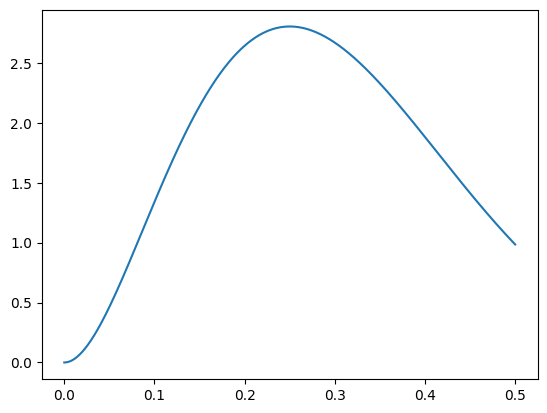

In [6]:
sns.lineplot(x=x,y=prior_pdf)

In [7]:
# Now we need the likelihood, so we need to collect data
# Weve collected data by sending emails to 300 people

IN VARIANT A (WITH PICTURE):
* 36 people clicked, 114 people havent

IN VARIANT B (WITHOUT PICTURE):
* 50 people clicked, 100 havent

In [8]:
alpha_variant_a = 36
beta_variant_a = 114

alpha_variant_b = 50
beta_variant_b = 100

In [9]:
likelihood_variant_a_pdf = stats.beta.pdf(x=x, a=alpha_variant_a, b=beta_variant_a)
likelihood_varianb_b_pdf = stats.beta.pdf(x=x, a=alpha_variant_b, b=beta_variant_b)

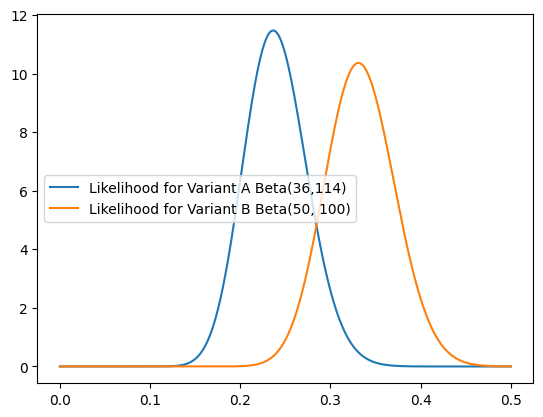

In [10]:
sns.lineplot(x=x, y=likelihood_variant_a_pdf, label="Likelihood for Variant A Beta(36,114)")
sns.lineplot(x=x, y=likelihood_varianb_b_pdf, label="Likelihood for Variant B Beta(50, 100)")

plt.show()

In [11]:
# CREATE POSTERIOR
alpha_variant_a_posterior = alpha + alpha_variant_a
beta_variant_a_posterior = beta + beta_variant_a

alpha_variant_b_posterior = alpha + alpha_variant_b
beta_variant_b_posterior = beta + beta_variant_b

variant_a_posterior_pdf = stats.beta.pdf(x=x, a=alpha_variant_a_posterior, b=beta_variant_a_posterior) 
variant_b_posterior_pdf = stats.beta.pdf(x=x, a=alpha_variant_b_posterior, b=beta_variant_b_posterior)

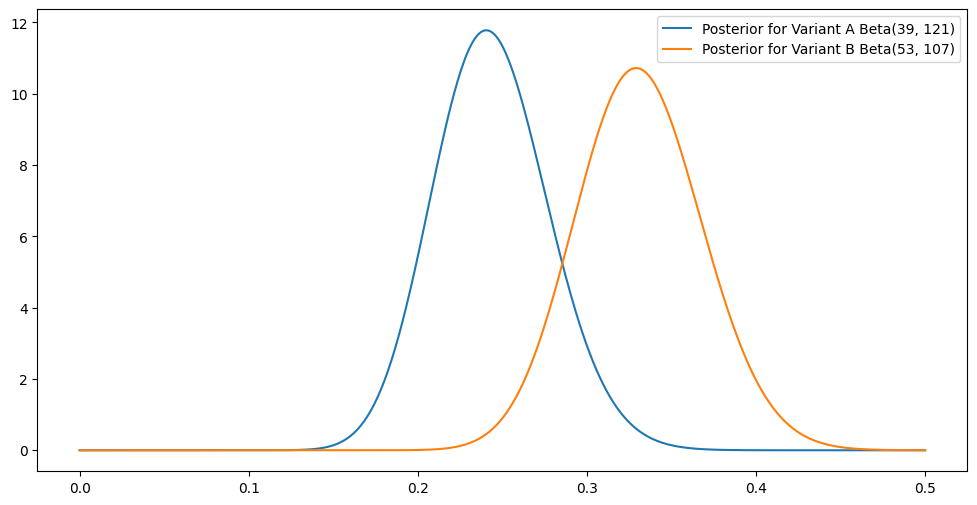

In [12]:
plt.figure(figsize=(12,6))

sns.lineplot(x=x, y=variant_a_posterior_pdf, label=f"Posterior for Variant A Beta({alpha_variant_a_posterior}, {beta_variant_a_posterior})")
sns.lineplot(x=x, y=variant_b_posterior_pdf, label=f"Posterior for Variant B Beta({alpha_variant_b_posterior}, {beta_variant_b_posterior})")

plt.show()

MONTE CARLO SIMULATION
* Any simulation that uses random sampling
* We will treat each simulated observations, so silmutanouesly drawn from A and B as a version of the world
* In each version this sample is the true conversion rate
* We expect variant B to have a higher true conversion rate in most of simulated worlds
* We can use a monte carlo simulation to see the ratio of worlds in which variant B turned out to be the better one
* Than we can get an exacyt probability that B is greater than A

In [13]:
# We run 100000 simulations
n_trials = 100000
# We sample from the beta distributions of both variants
# FOR VARIANT A
samples_variant_a = stats.beta.rvs(size=n_trials, a = alpha_variant_a_posterior, b = beta_variant_a_posterior)
samples_variant_b = stats.beta.rvs(size = n_trials, a=alpha_variant_b_posterior, b=beta_variant_b_posterior)

In [14]:
samples_variant_a.mean()

0.2438792789255235

In [15]:
samples_variant_b.mean()

0.33126041397138617

In [17]:
b_larger_than_a = 0
for i in range(len(samples_variant_a)): 
    if samples_variant_b[i]>samples_variant_a[i]:
        b_larger_than_a+=1

In [18]:
b_larger_than_a/n_trials

0.95931

* In 96 % of the "worlds" variant B produced a higher click through rate then variant A

In [19]:
samples_variant_b/samples_variant_a

array([1.35649684, 1.09130082, 1.12340023, ..., 1.32336417, 0.94425295,
       1.34312494])

<Axes: ylabel='Count'>

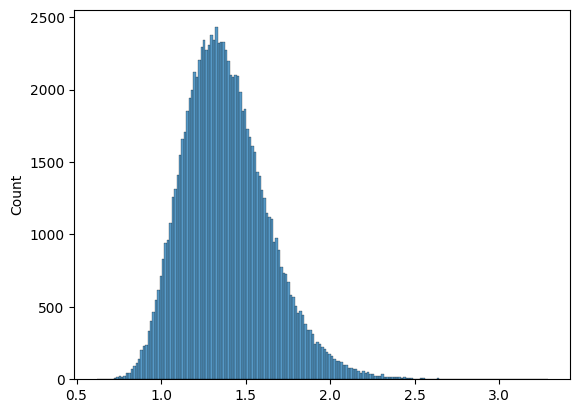

In [20]:
sns.histplot(x=samples_variant_b/samples_variant_a)
# How much choosing variant B is likely to improve our click through rates

In [25]:
y = np.array(stats.ecdf(samples_variant_b/samples_variant_a))
x=np.linspace(start=0, stop=0.5, num=500)

In [ ]:
# Exercises
# 1
# CREATE POSTERIOR

# PRIOR DISTRIBUTION, STRONGER PRIOR
alpha=3*100
beta=7*100

alpha_variant_a_posterior = alpha + alpha_variant_a
beta_variant_a_posterior = beta + beta_variant_a

alpha_variant_b_posterior = alpha + alpha_variant_b
beta_variant_b_posterior = beta + beta_variant_b

variant_a_posterior_pdf = stats.beta.pdf(x=x, a=alpha_variant_a_posterior, b=beta_variant_a_posterior) 
variant_b_posterior_pdf = stats.beta.pdf(x=x, a=alpha_variant_b_posterior, b=beta_variant_b_posterior)

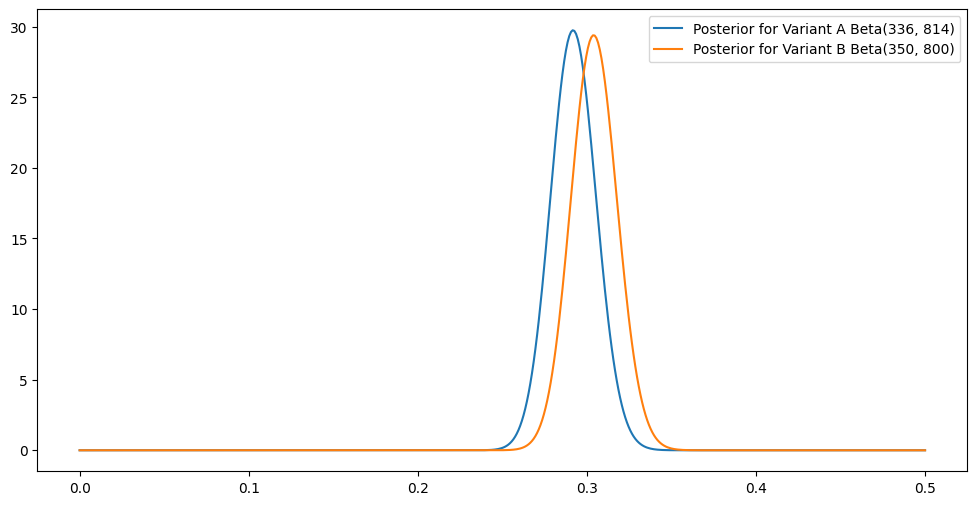

In [37]:
plt.figure(figsize=(12,6))

sns.lineplot(x=x, y=variant_a_posterior_pdf, label=f"Posterior for Variant A Beta({alpha_variant_a_posterior}, {beta_variant_a_posterior})")
sns.lineplot(x=x, y=variant_b_posterior_pdf, label=f"Posterior for Variant B Beta({alpha_variant_b_posterior}, {beta_variant_b_posterior})")

plt.show()

In [38]:
# We run 100000 simulations
n_trials = 100000
# We sample from the beta distributions of both variants
# FOR VARIANT A
samples_variant_a = stats.beta.rvs(size=n_trials, a = alpha_variant_a_posterior, b = beta_variant_a_posterior)
samples_variant_b = stats.beta.rvs(size = n_trials, a=alpha_variant_b_posterior, b=beta_variant_b_posterior)

b_larger_than_a = 0
for i in range(len(samples_variant_a)): 
    if samples_variant_b[i]>samples_variant_a[i]:
        b_larger_than_a+=1

In [41]:
b_larger_than_a/len(samples_variant_a)

0.73598

<Axes: ylabel='Count'>

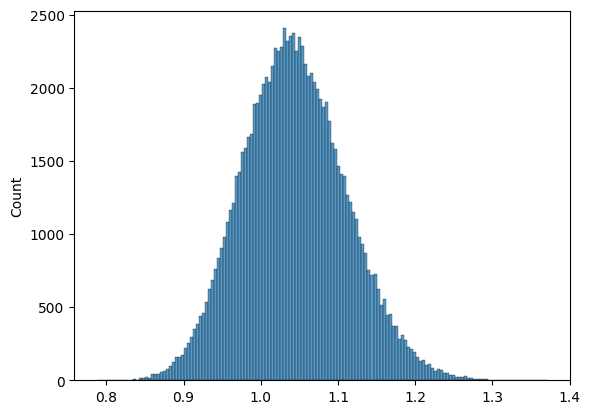

In [39]:
sns.histplot(x=samples_variant_b/samples_variant_a)

In [66]:
# 2
alpha=30
beta=70

alpha_variant_a_posterior = alpha + alpha_variant_a
beta_variant_a_posterior = beta + beta_variant_a

alpha_variant_b_posterior = 20 + alpha_variant_b
beta_variant_b_posterior = 80 + beta_variant_b

variant_a_posterior_pdf = stats.beta.pdf(x=x, a=alpha_variant_a_posterior, b=beta_variant_a_posterior) 
variant_b_posterior_pdf = stats.beta.pdf(x=x, a=alpha_variant_b_posterior, b=beta_variant_b_posterior)

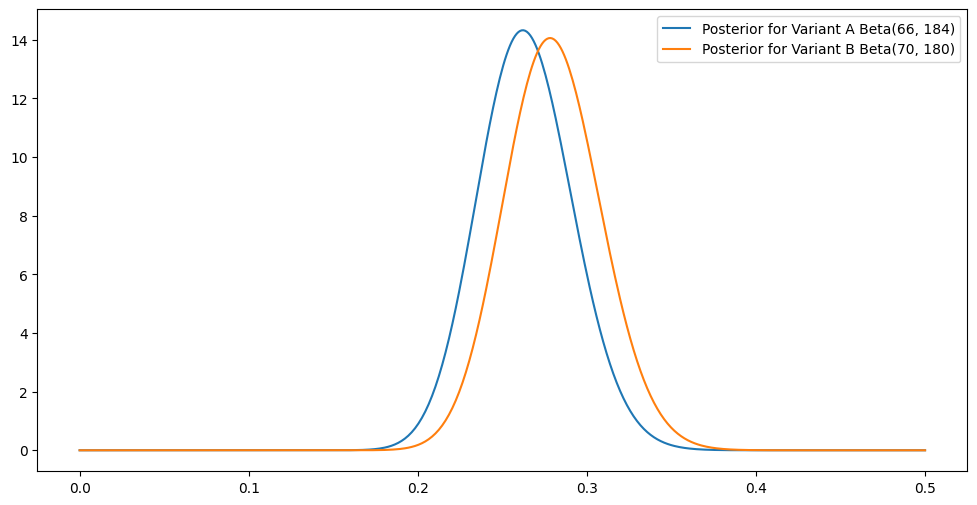

In [67]:
plt.figure(figsize=(12,6))

sns.lineplot(x=x, y=variant_a_posterior_pdf, label=f"Posterior for Variant A Beta({alpha_variant_a_posterior}, {beta_variant_a_posterior})")
sns.lineplot(x=x, y=variant_b_posterior_pdf, label=f"Posterior for Variant B Beta({alpha_variant_b_posterior}, {beta_variant_b_posterior})")

plt.show()

In [68]:
# We run 100000 simulations
n_trials = 100000
# We sample from the beta distributions of both variants
# FOR VARIANT A
samples_variant_a = stats.beta.rvs(size=n_trials, a = alpha_variant_a_posterior, b = beta_variant_a_posterior)
samples_variant_b = stats.beta.rvs(size = n_trials, a=alpha_variant_b_posterior, b=beta_variant_b_posterior)

b_larger_than_a = 0
for i in range(len(samples_variant_a)): 
    if samples_variant_b[i]>samples_variant_a[i]:
        b_larger_than_a+=1

In [69]:
b_larger_than_a/len(samples_variant_a)

0.6561

In [128]:
true_rate_A = 0.25
true_rate_B = 0.3

num_of_samples = 1000

In [129]:
likelihood_A = stats.bernoulli.rvs(p=true_rate_A, size=num_of_samples)
likelihood_B = stats.bernoulli.rvs(p=true_rate_B, size = num_of_samples)


unique, counts = np.unique(likelihood_A, return_counts=True)

likelihood_beta_A = counts[0]
likelihood_alpha_A = counts[1]

In [130]:
unique, counts = np.unique(likelihood_B, return_counts=True)

likelihood_beta_B = counts[0]
likelihood_alpha_B = counts[1]

In [131]:
likelihood_alpha_B

284

In [132]:
# 3

alpha_prior=3*100
beta_prior=7*100

alpha_variant_a_posterior = alpha_prior + likelihood_alpha_A
beta_variant_a_posterior = beta_prior + likelihood_beta_A

alpha_variant_b_posterior = alpha_prior + likelihood_alpha_B
beta_variant_b_posterior = beta_prior + likelihood_beta_B

In [133]:
# We run 100000 simulations
n_trials = 100000
# We sample from the beta distributions of both variants
# FOR VARIANT A
samples_variant_a = stats.beta.rvs(size=n_trials, a = alpha_variant_a_posterior, b = beta_variant_a_posterior)
samples_variant_b = stats.beta.rvs(size = n_trials, a=alpha_variant_b_posterior, b=beta_variant_b_posterior)

b_larger_than_a = 0
for i in range(len(samples_variant_a)): 
    if samples_variant_b[i]>samples_variant_a[i]:
        b_larger_than_a+=1


b_larger_than_a/len(samples_variant_a)

0.95432